In [1]:
import sys
import os

sys.path.append('/home/profes/miriamgf/tesis/Autoencoders/code/egm_reconstruction/Code/')


from ..config import TrainConfig_1
from ..config import TrainConfig_2
from ..config import DataConfig
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from tools_ import freq_phase_analysis as freq_pha
from tools_ import plots
from tools_.preprocessing_network import *
from tools_.tools import *
from tools_.df_mapping import *
import tensorflow as tf
import os
import scipy
import datetime
import time
from evaluate_function import *
from numpy import *
import pickle
import sys
import mlflow
import itertools
from scipy.signal import find_peaks


sys.path.append('/code')
tf.random.set_seed(42)

root_logdir = '../output/logs/'
log_dir = root_logdir + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
data_dir = '/home/profes/miriamgf/tesis/Autoencoders/Data/'
torsos_dir = '/home/profes/miriamgf/tesis/Autoencoders/Labeled_torsos/'
figs_dir = '../output/'
models_dir = '../output/model/'
dict_var_dir = '../output/variables/'
dict_results_dir = '../output/results/'


dic_vars = {}
dict_results = {}

# GPU Configuration
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

start = time.time()

all_torsos_names = []
for subdir, dirs, files in os.walk(torsos_dir):
    for file in files:
        if file.endswith('.mat'):
            all_torsos_names.append(file)


all_model_names = []
directory = data_dir
for subdir, dirs, files in os.walk(directory):
    #print(subdir, directory, files)

    if (subdir != directory):
        model_name = subdir.split("/")[-1]
        all_model_names.append(model_name)


#Load data
df = load_egms_df(data_dir)
df= df.sort_values(by='id')
df.head(10)



ModuleNotFoundError: No module named 'config'

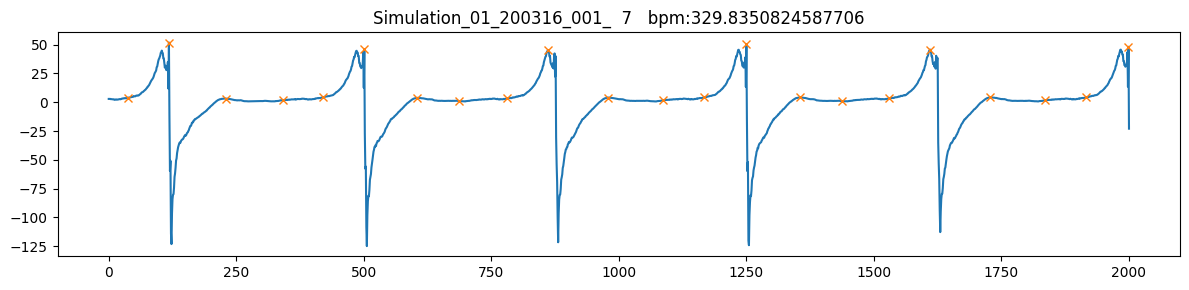

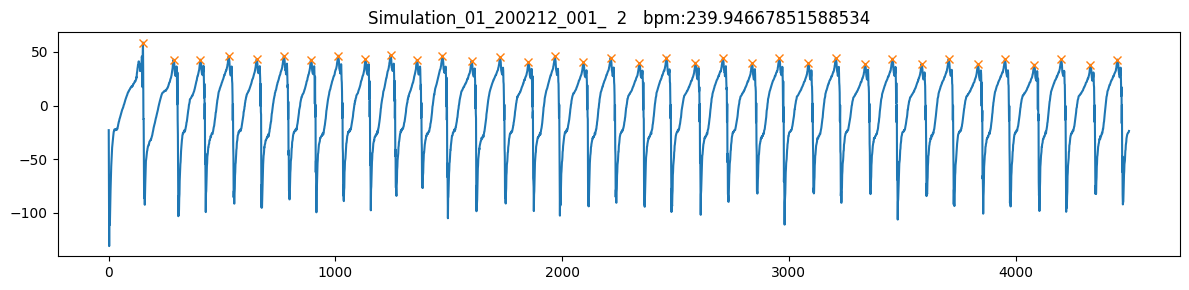

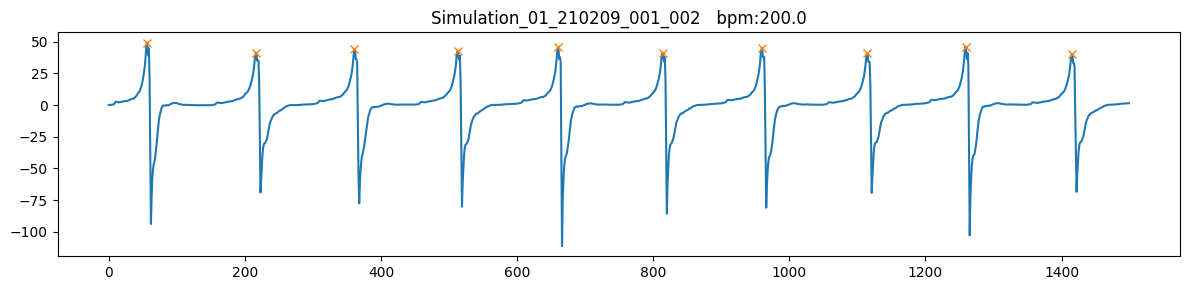

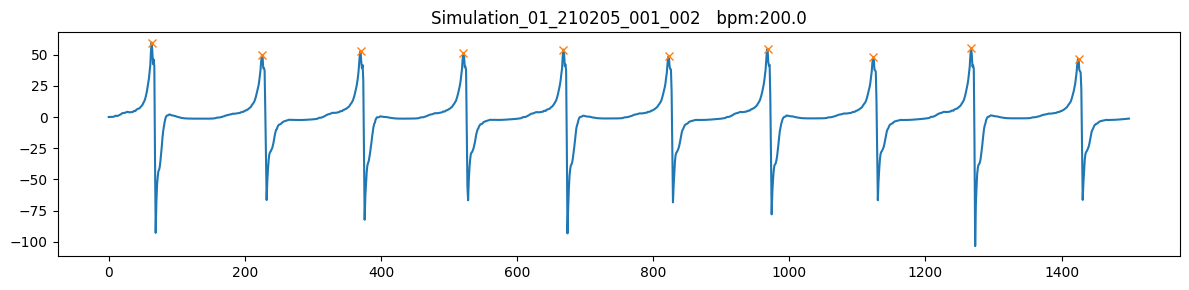

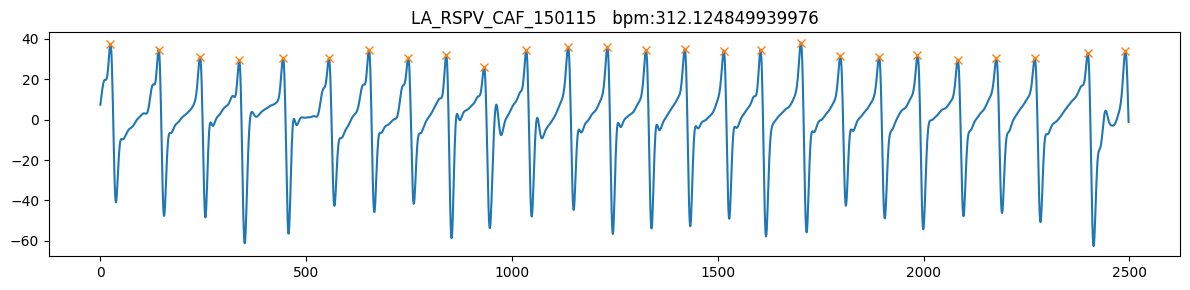

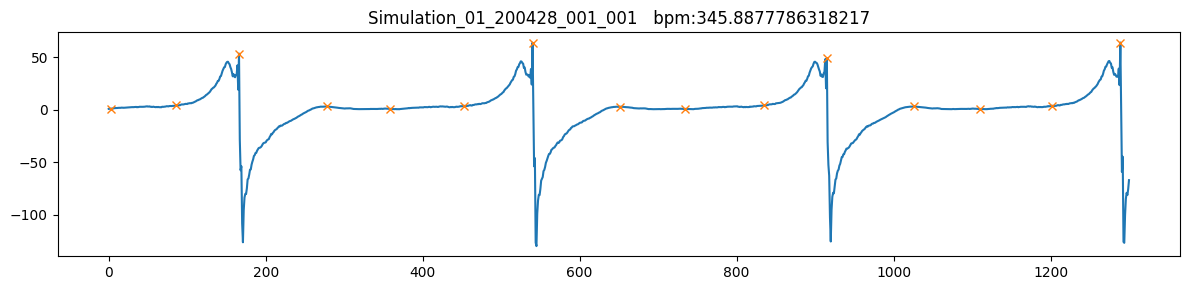

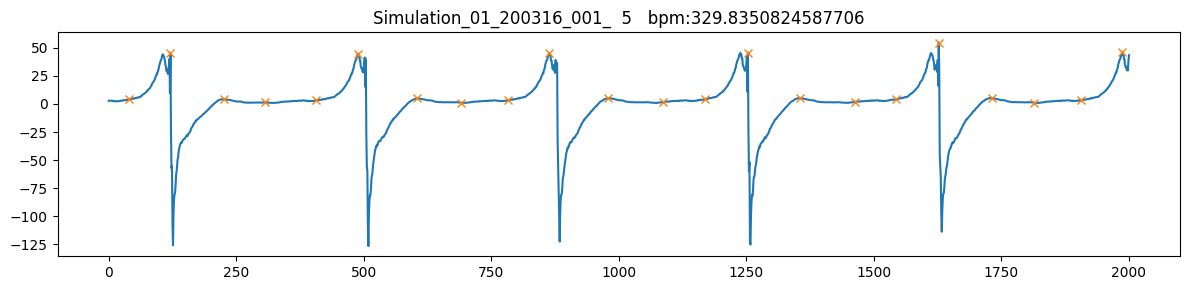

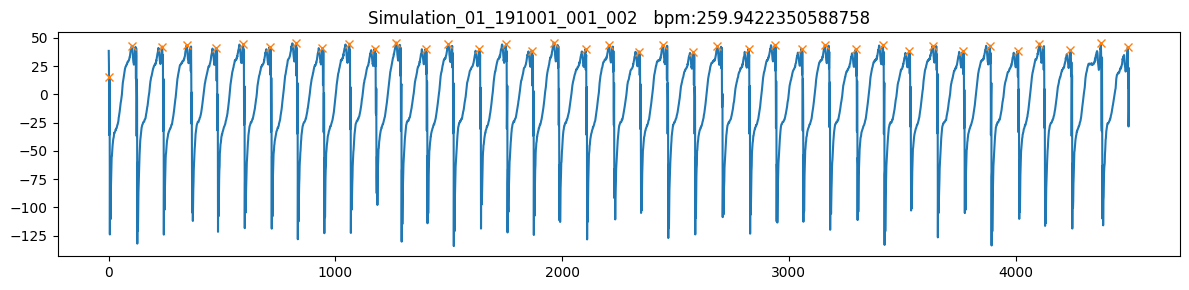

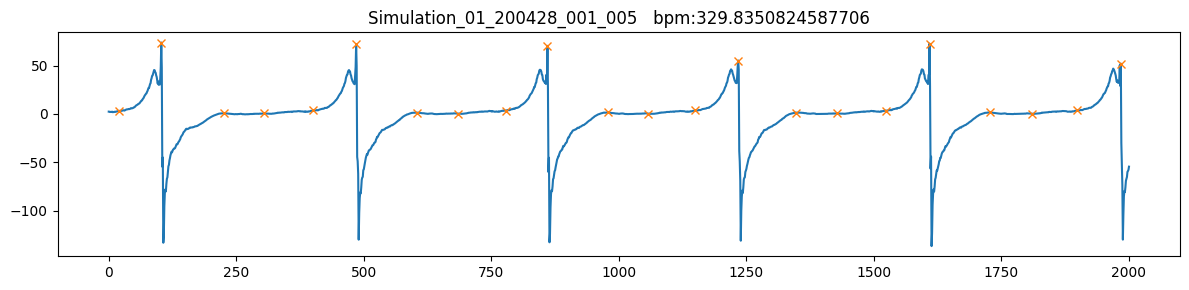

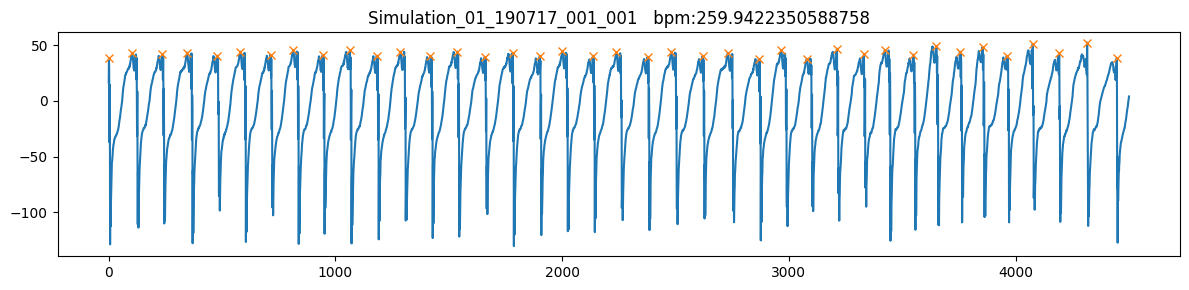

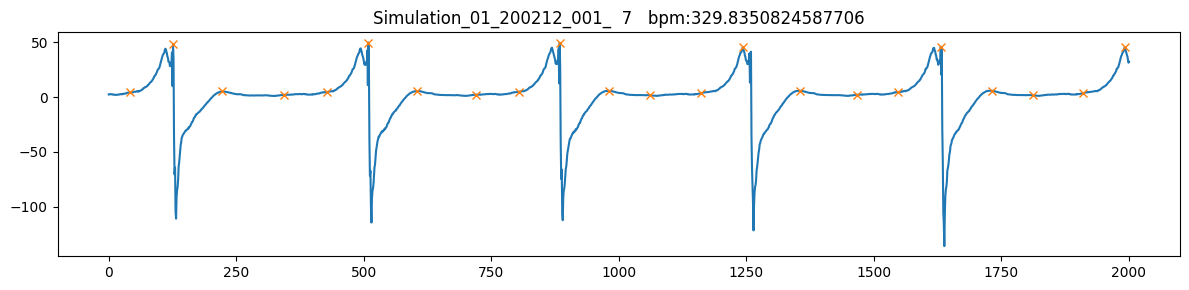

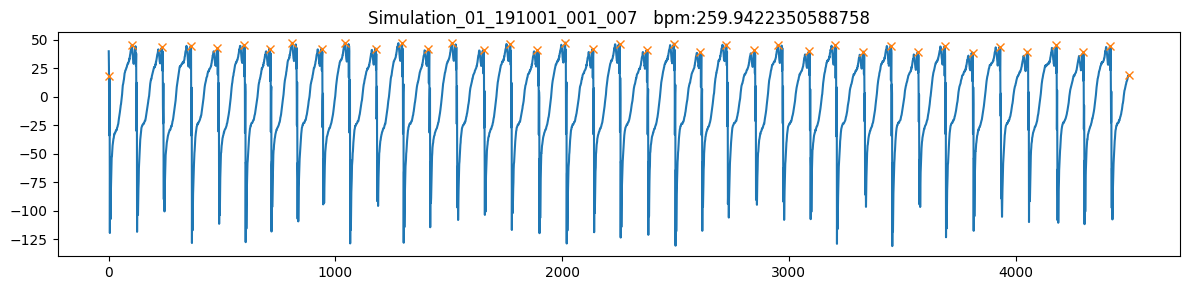

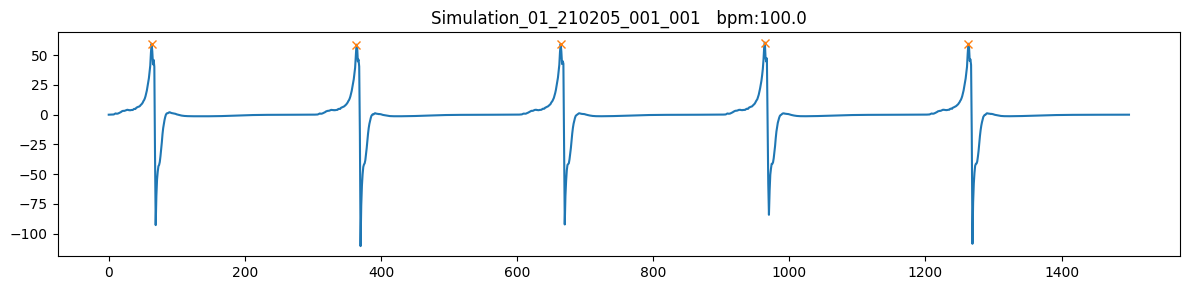

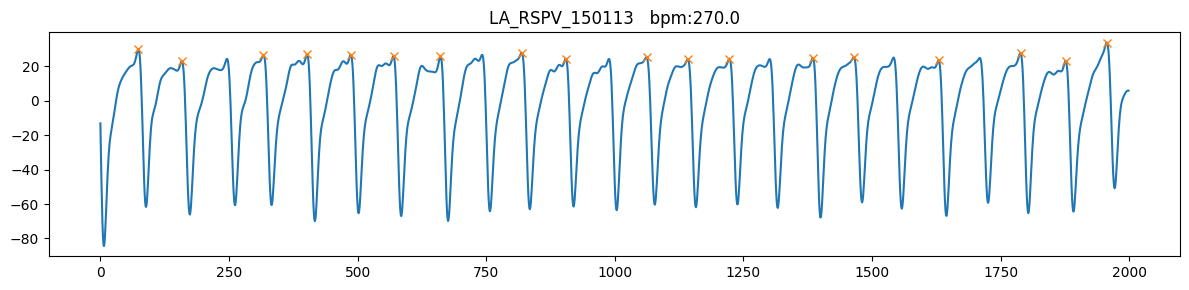

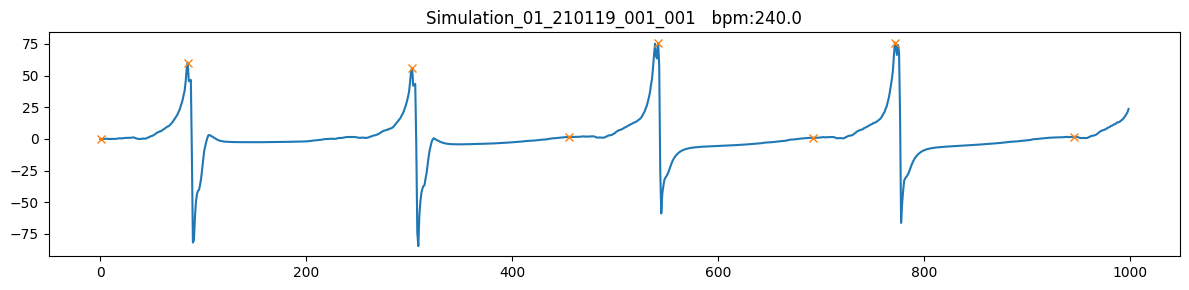

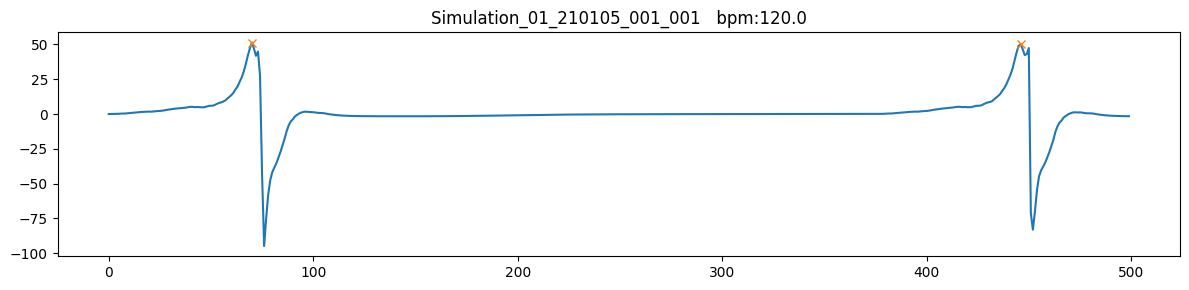

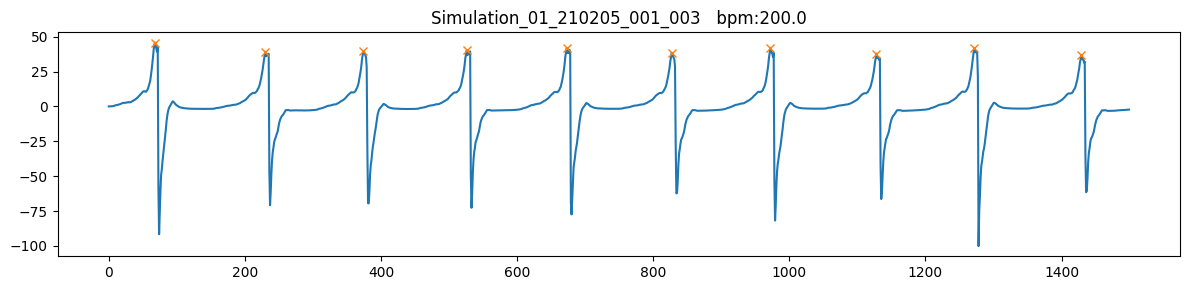

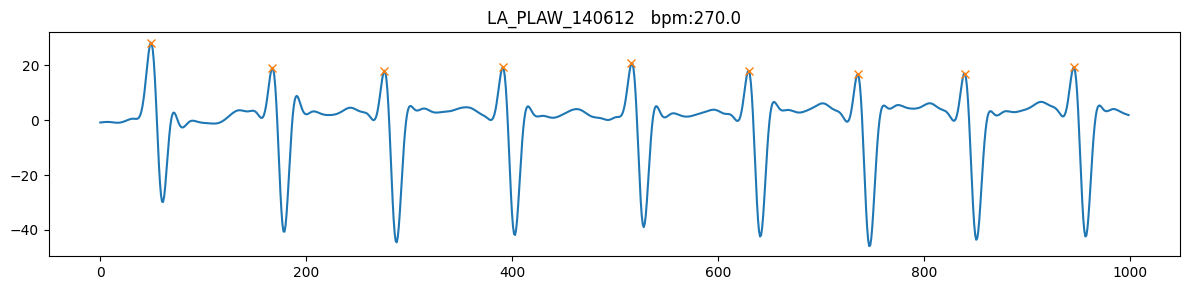

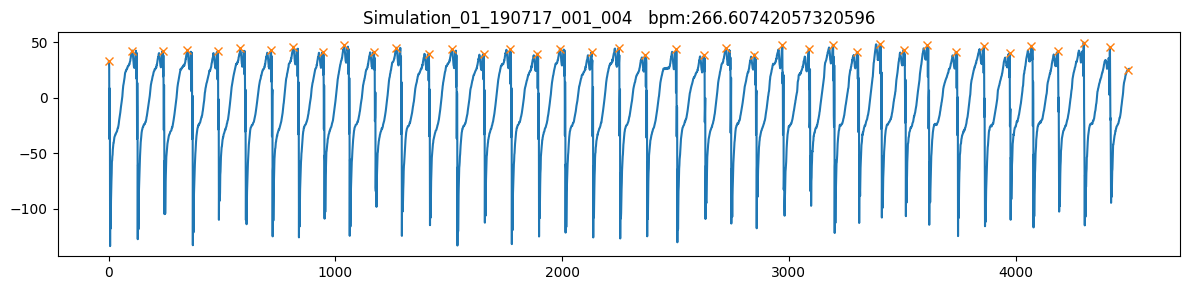

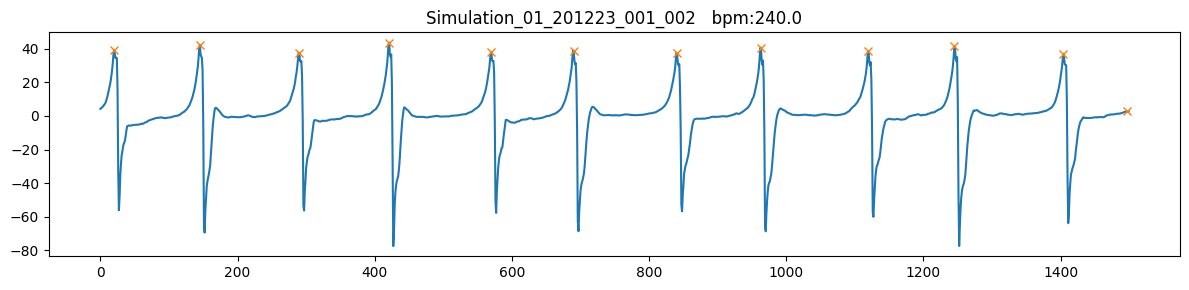

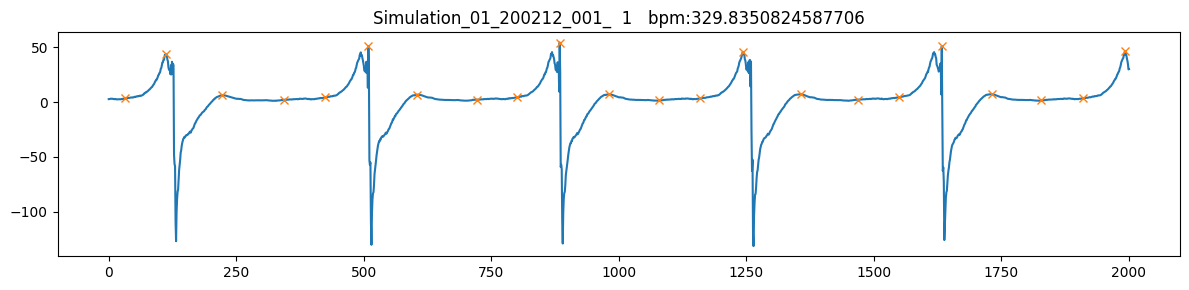

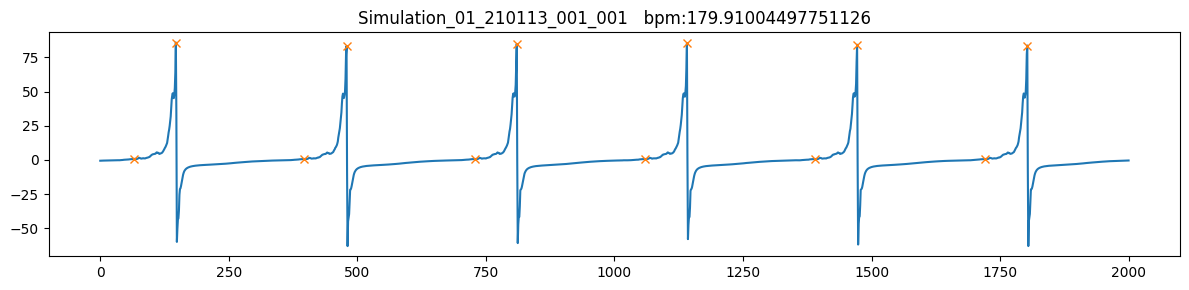

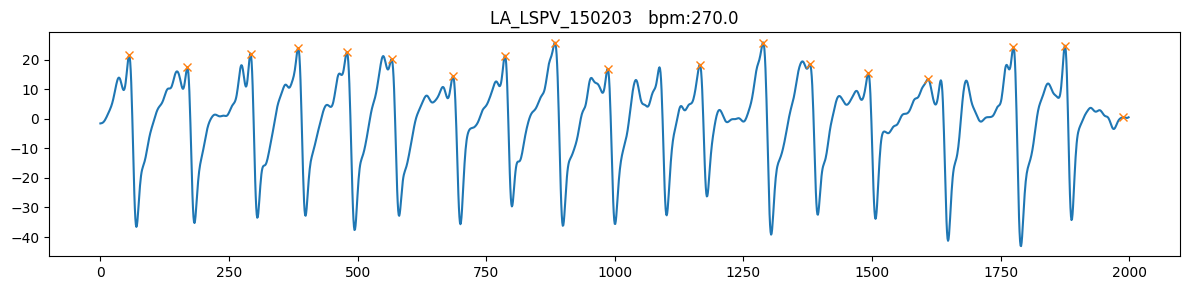

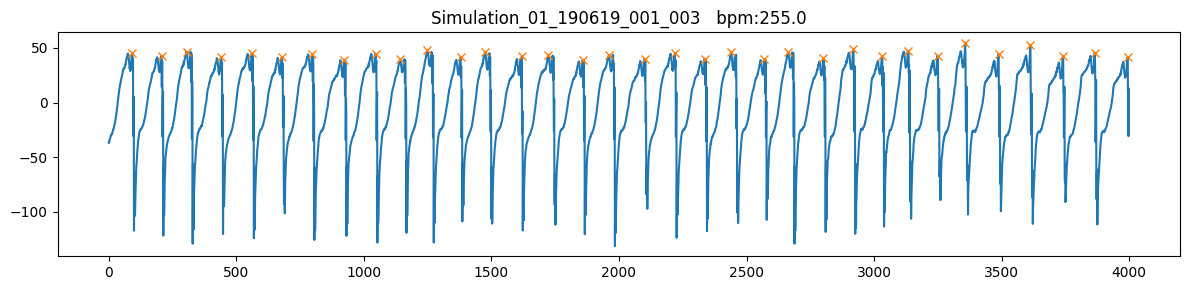

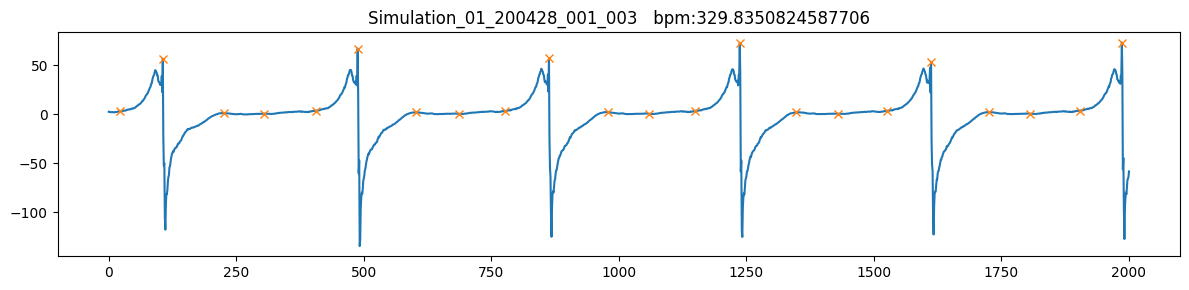

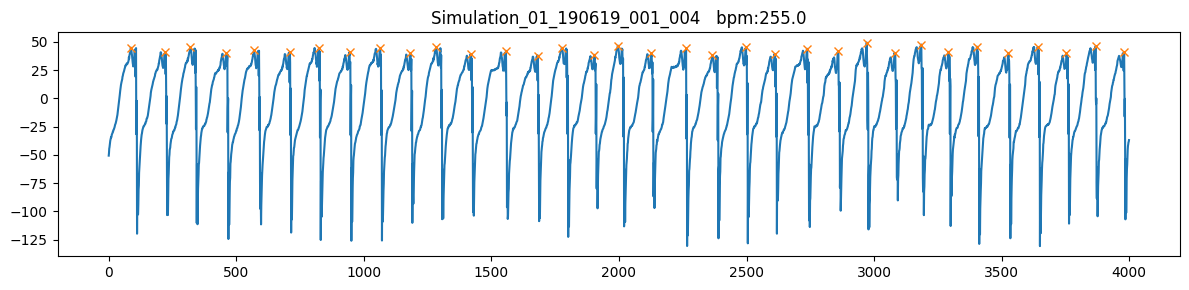

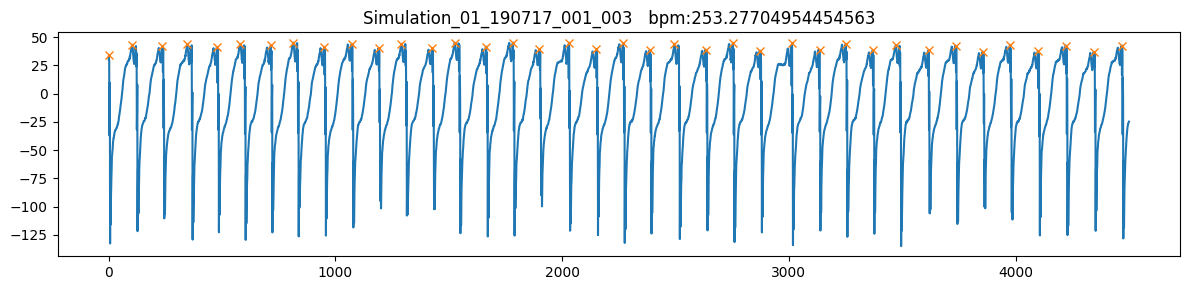

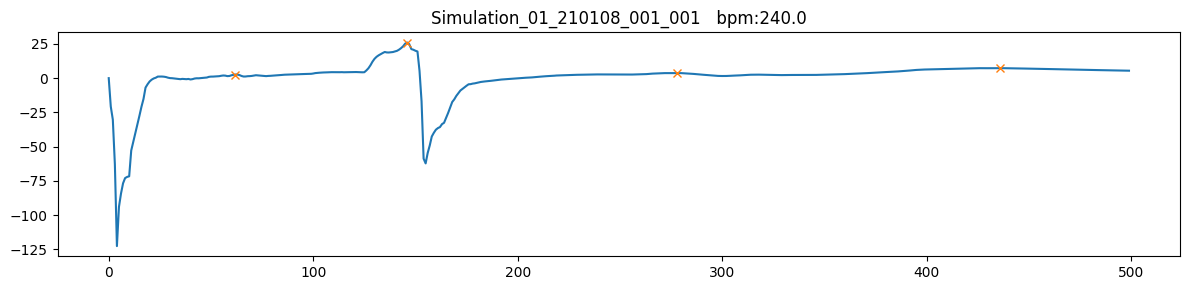

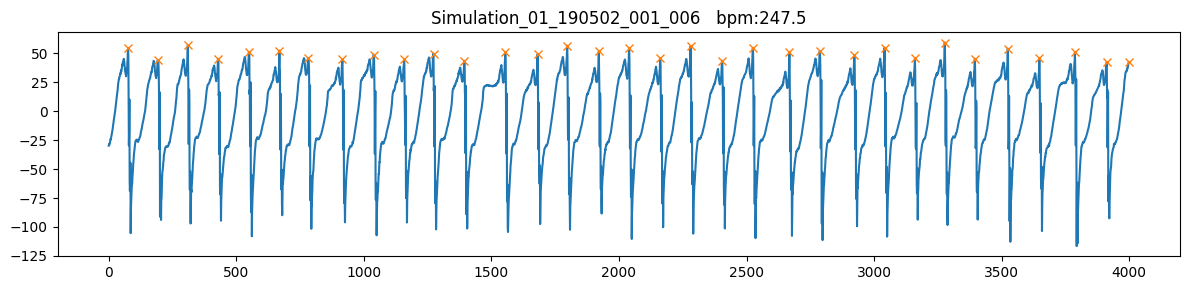

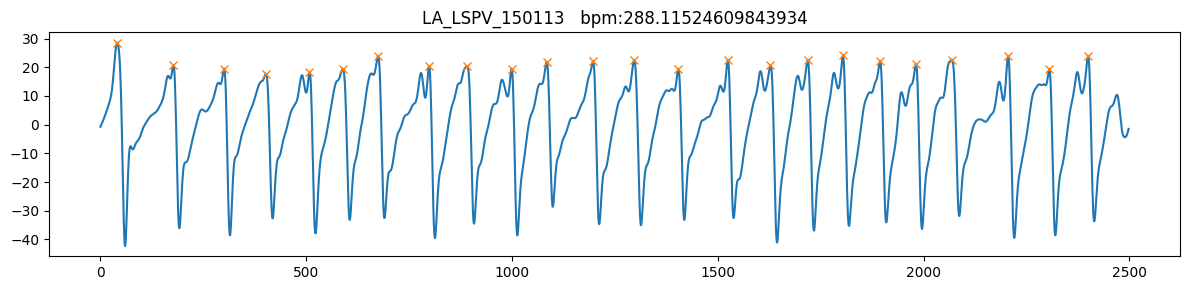

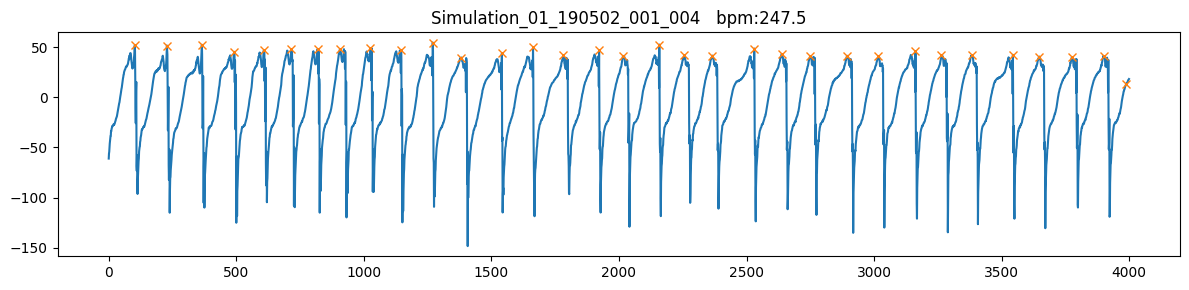

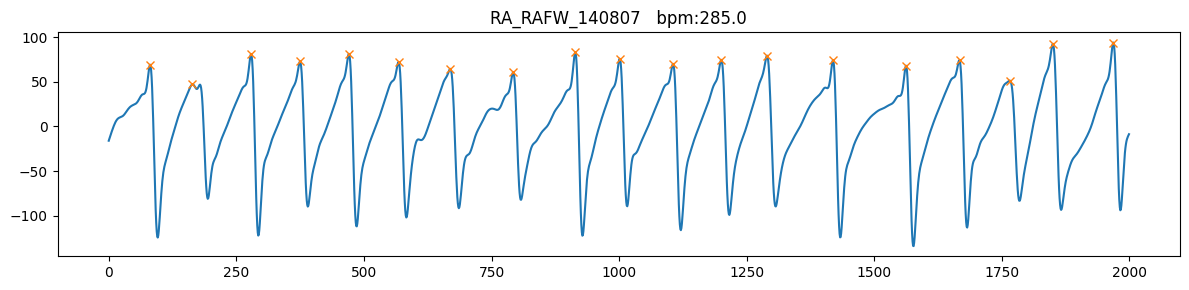

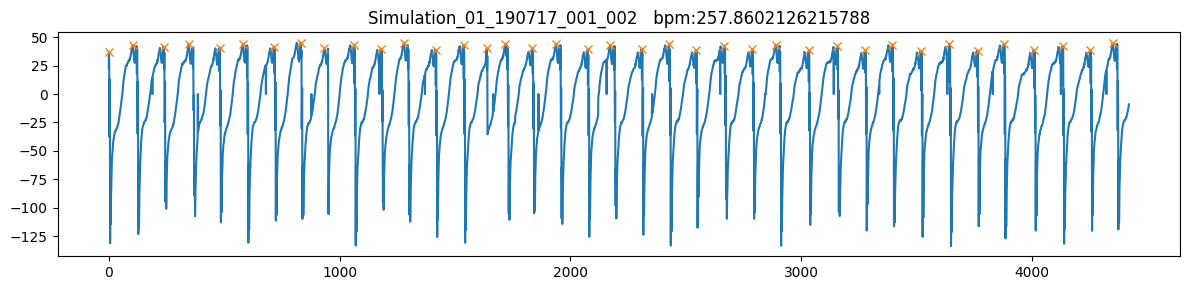

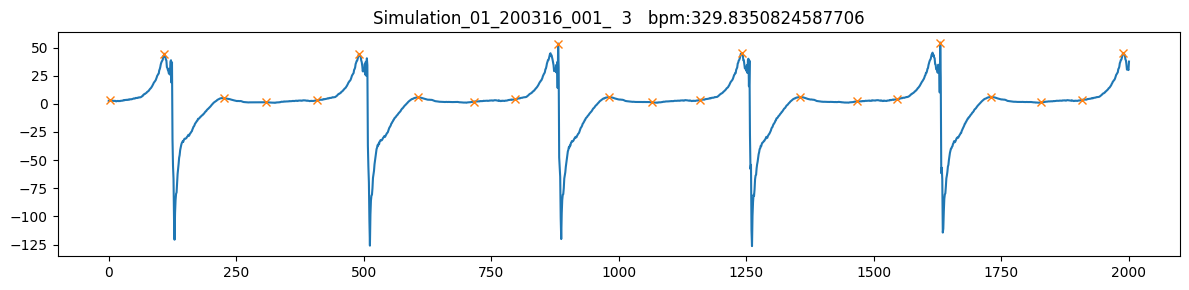

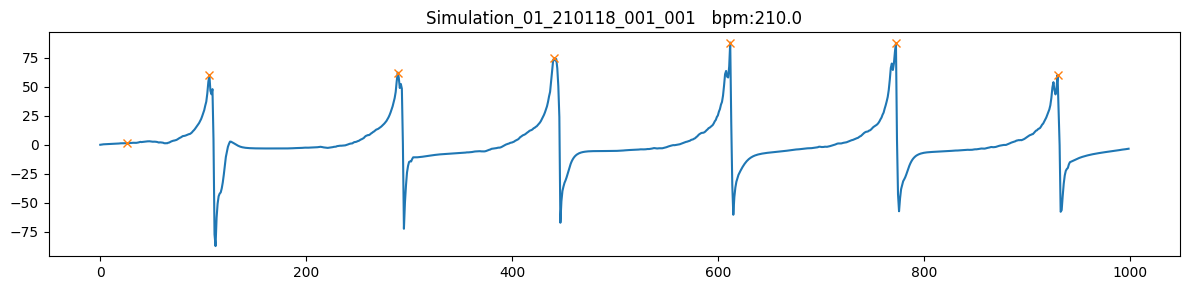

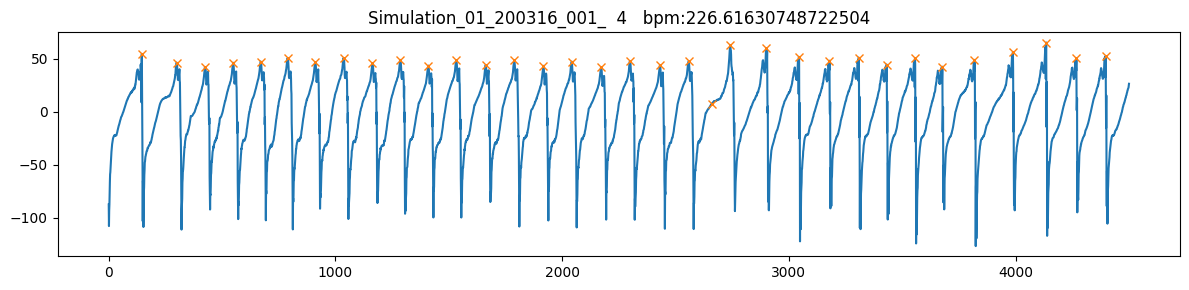

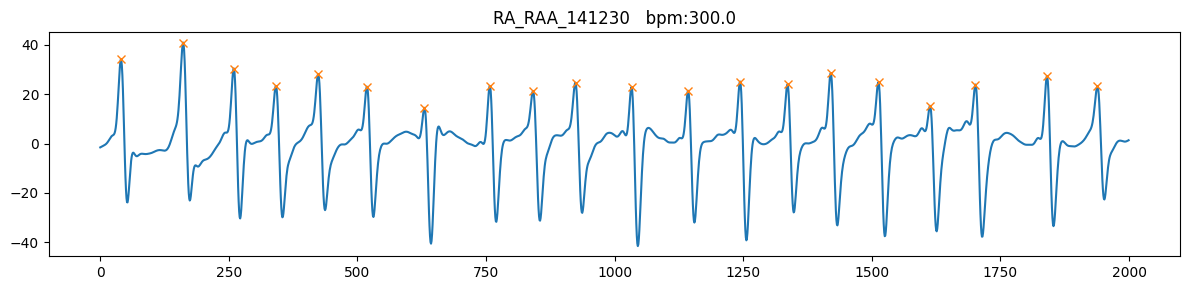

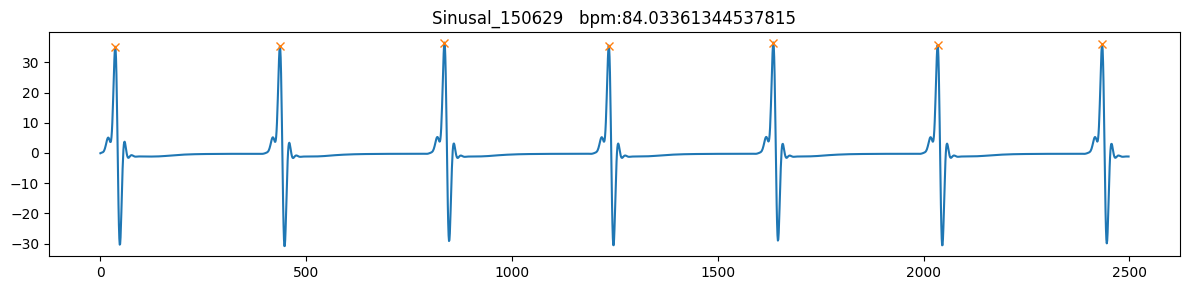

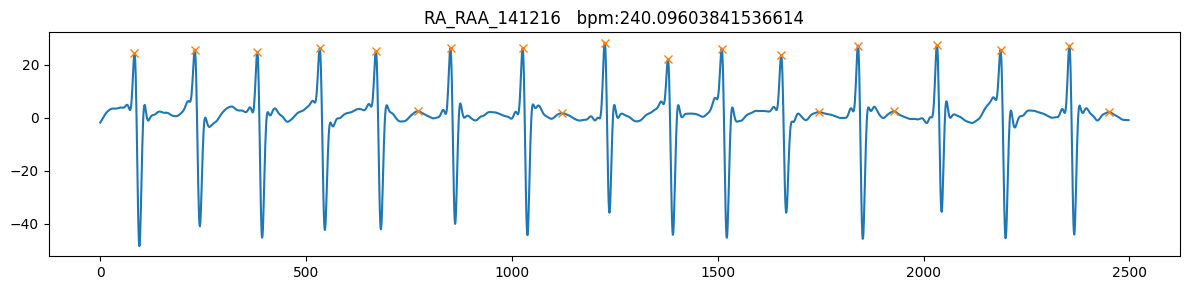

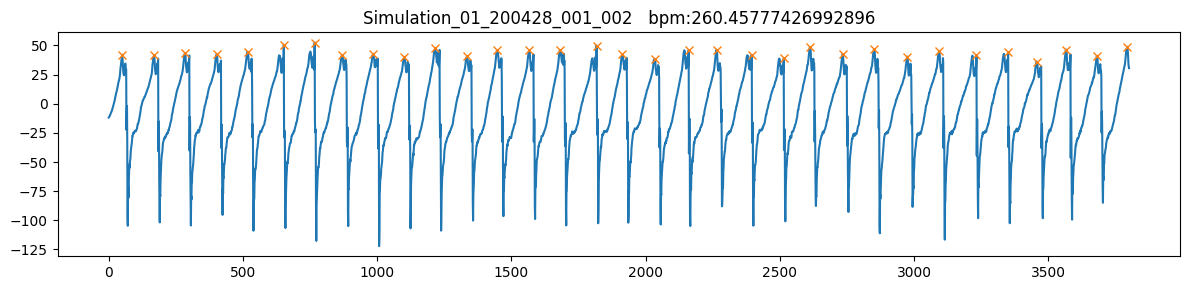

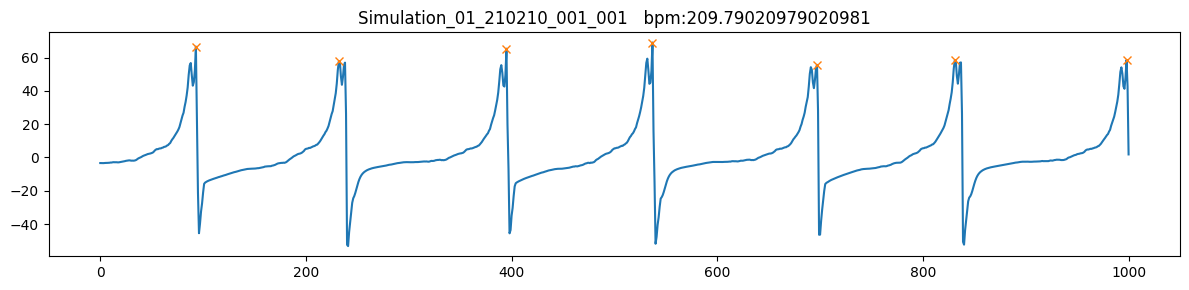

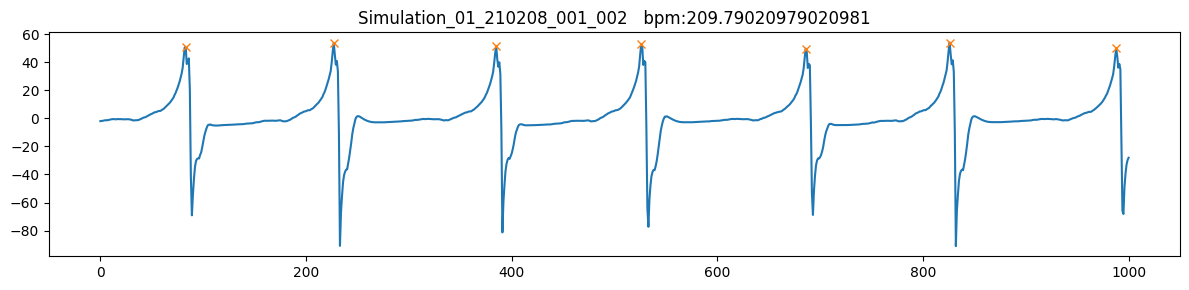

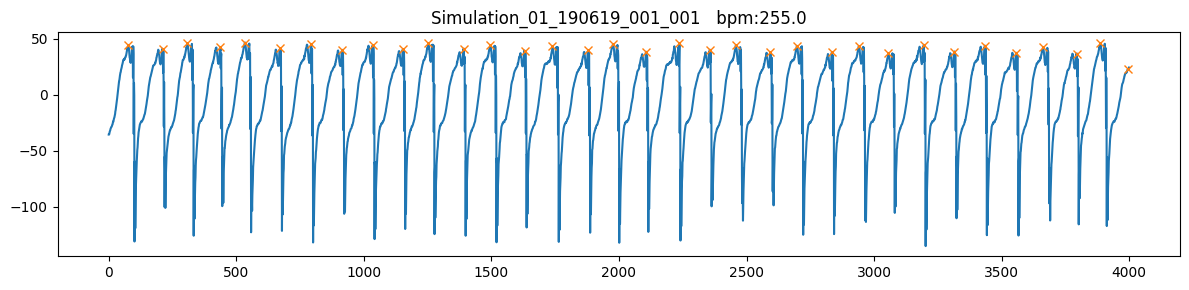

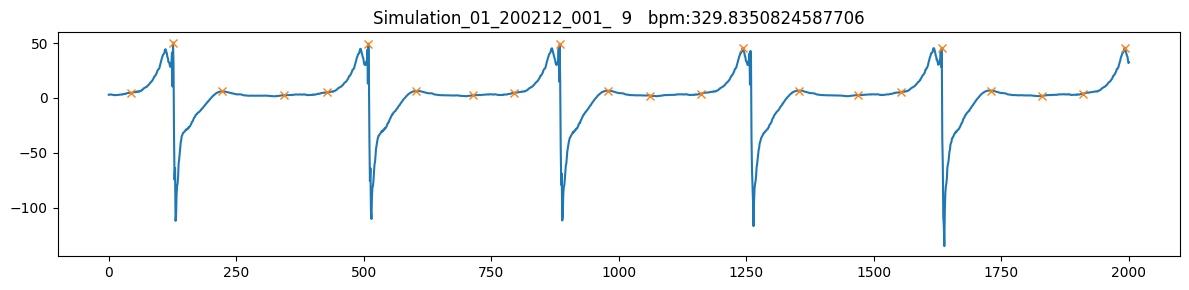

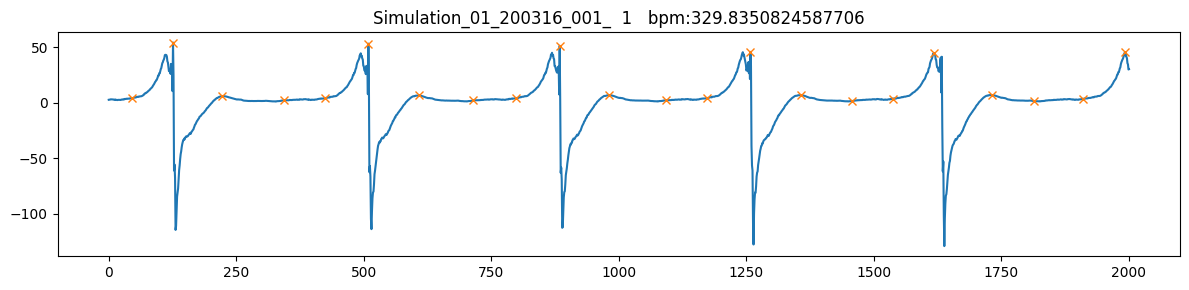

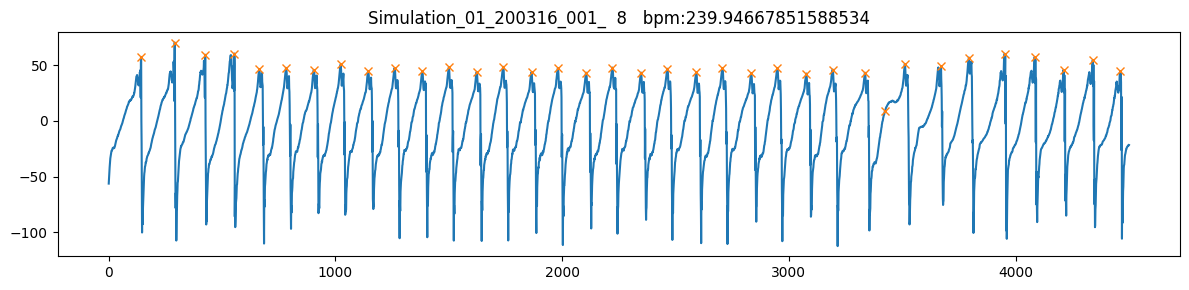

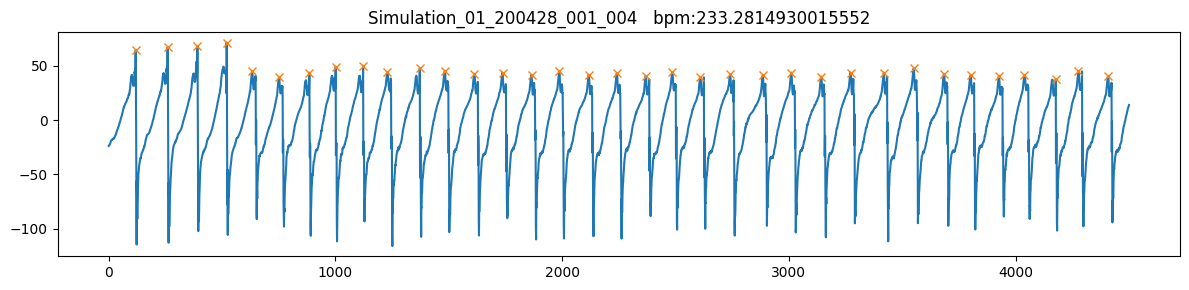

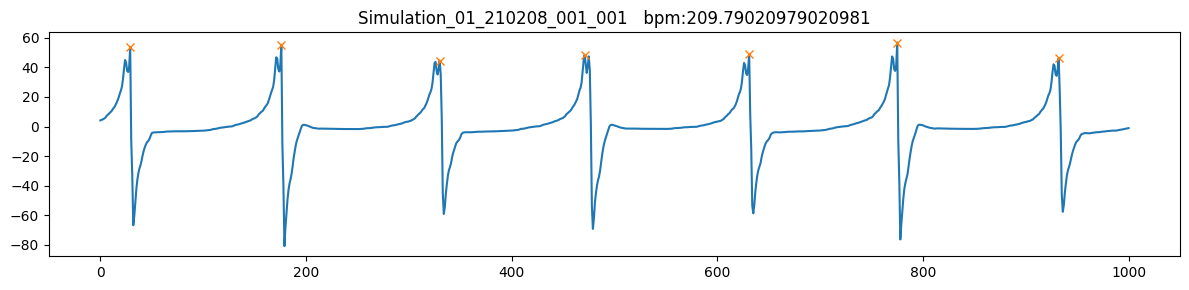

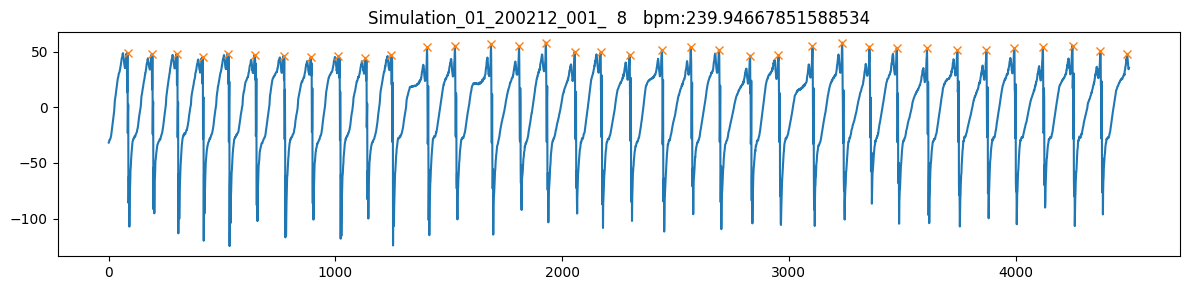

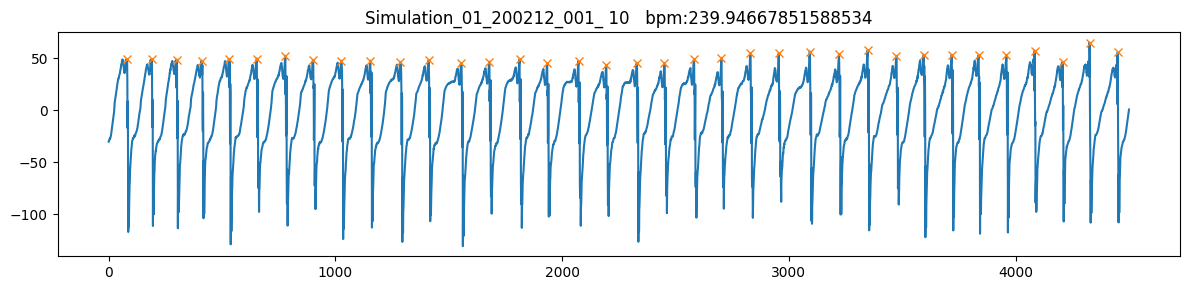

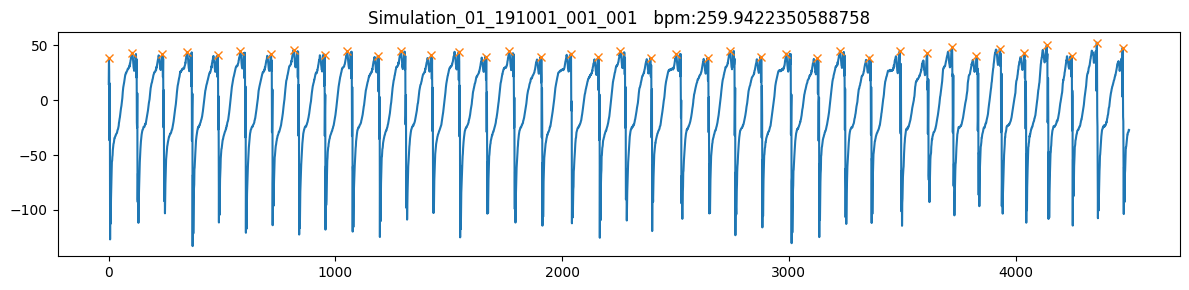

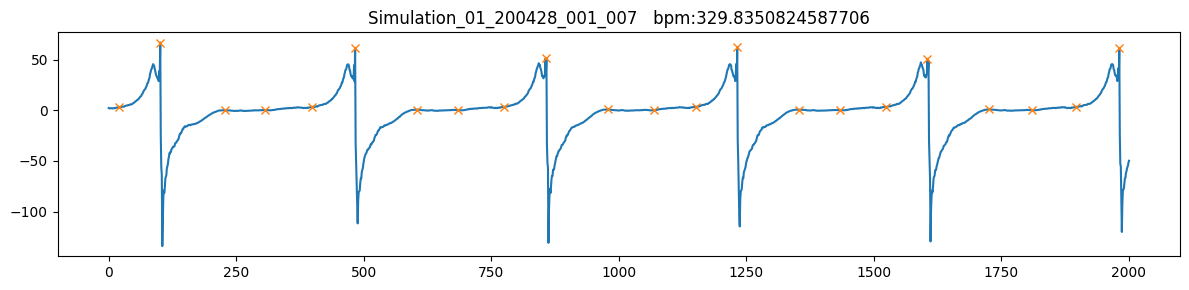

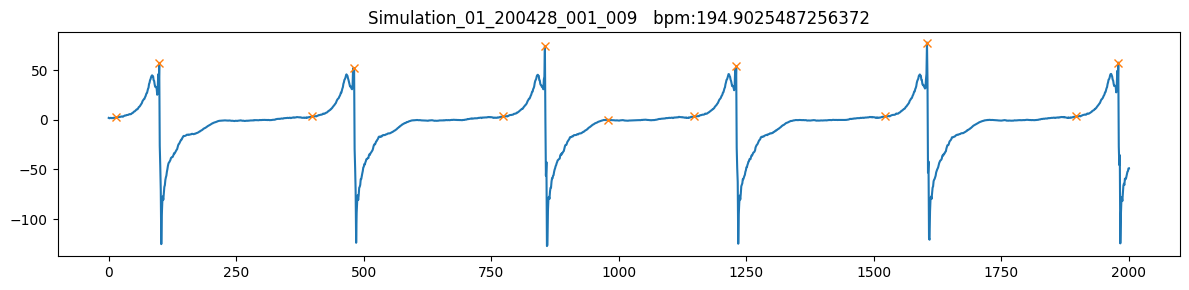

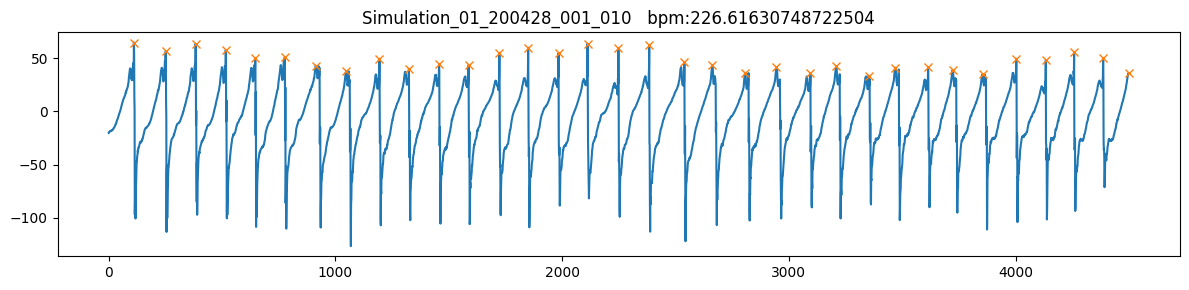

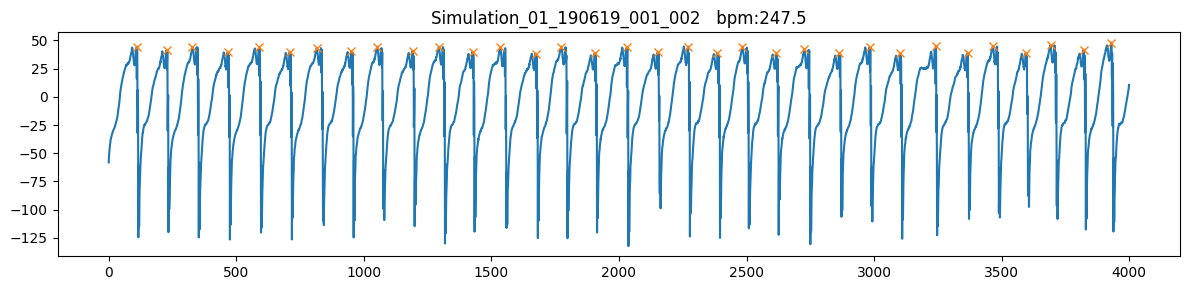

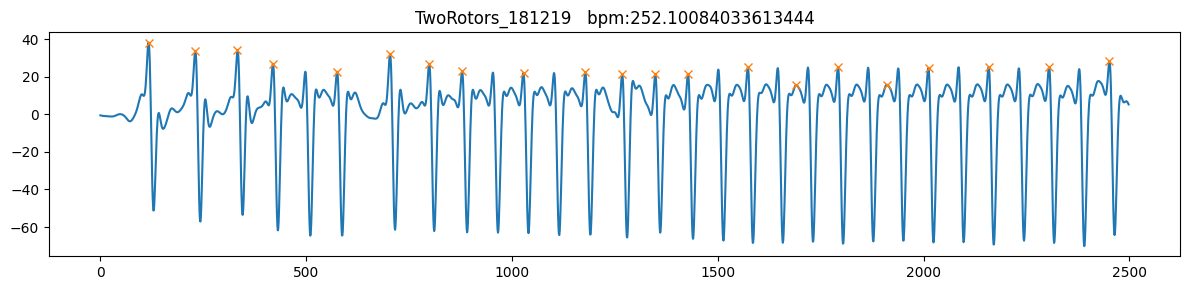

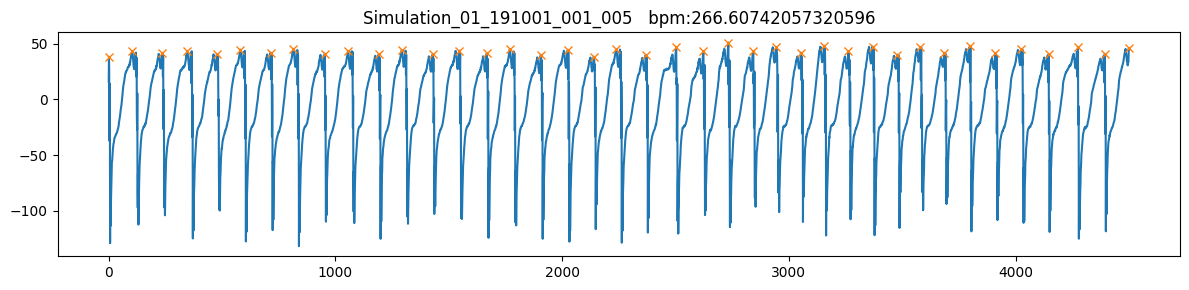

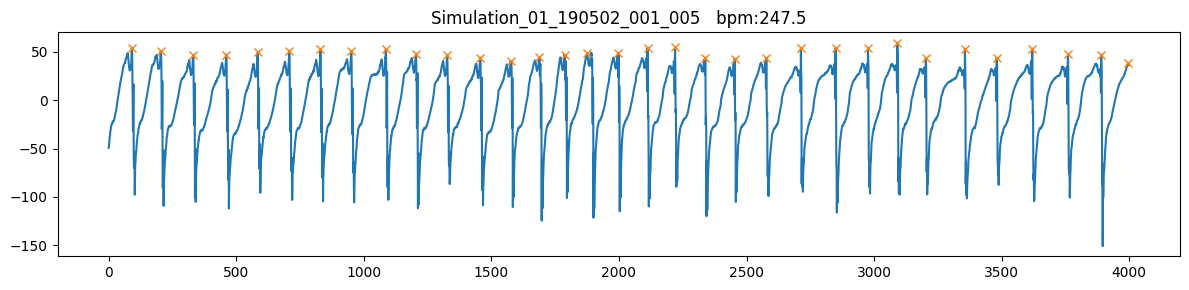

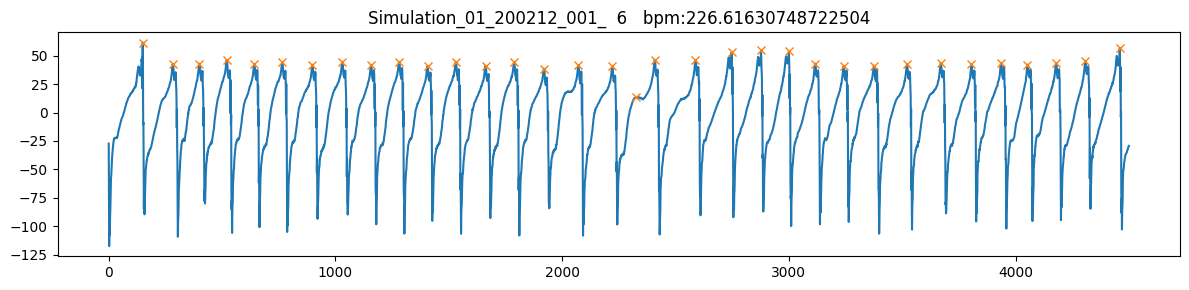

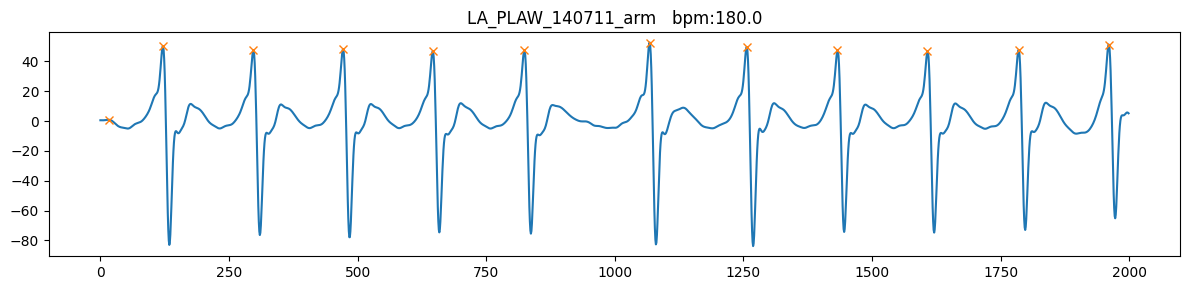

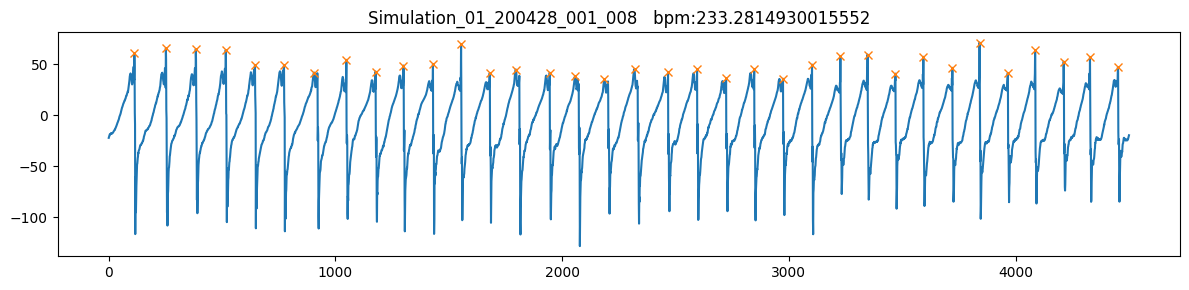

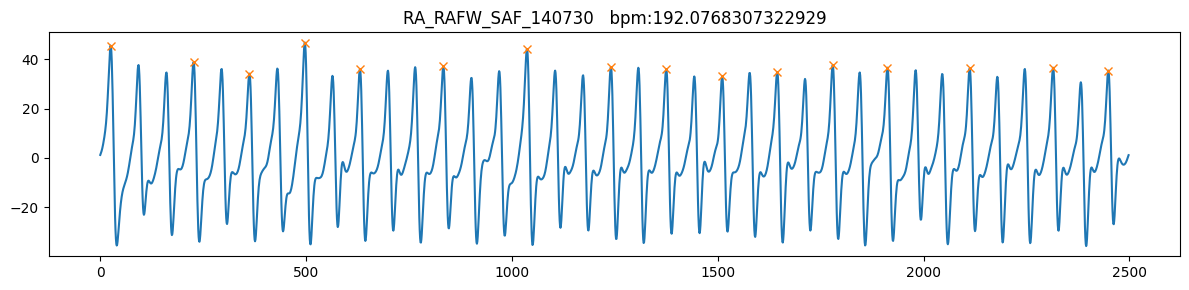

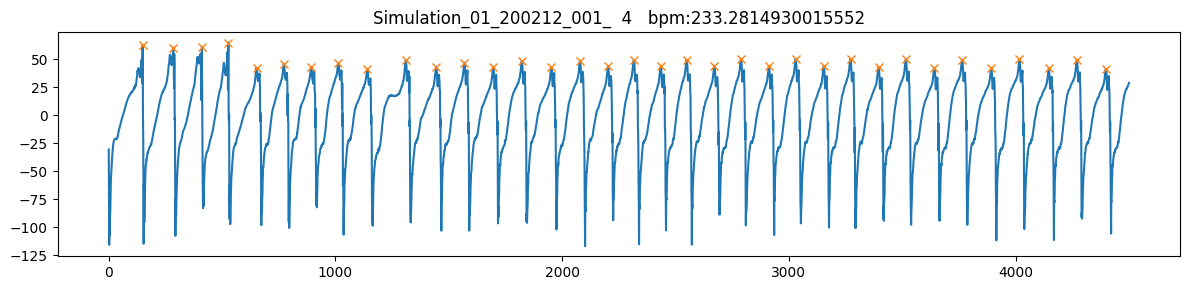

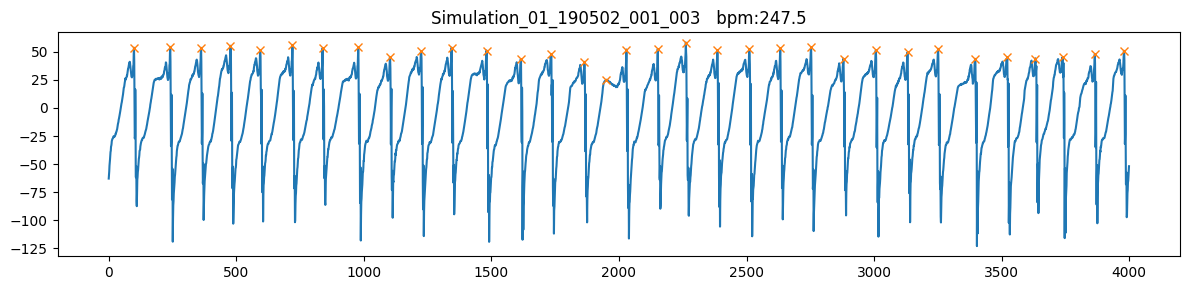

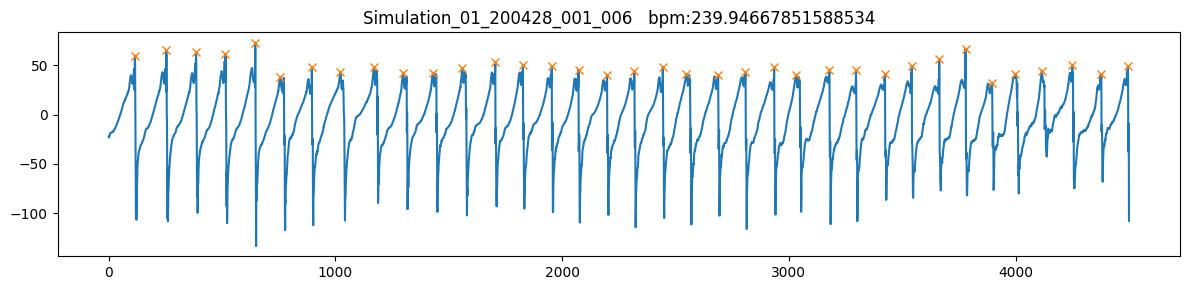

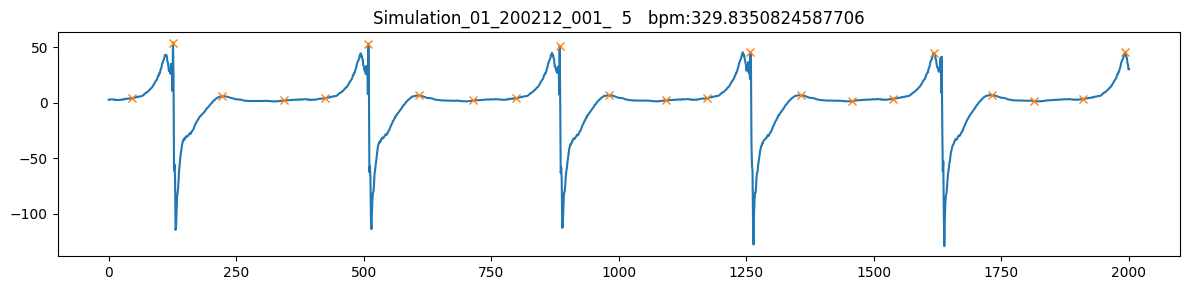

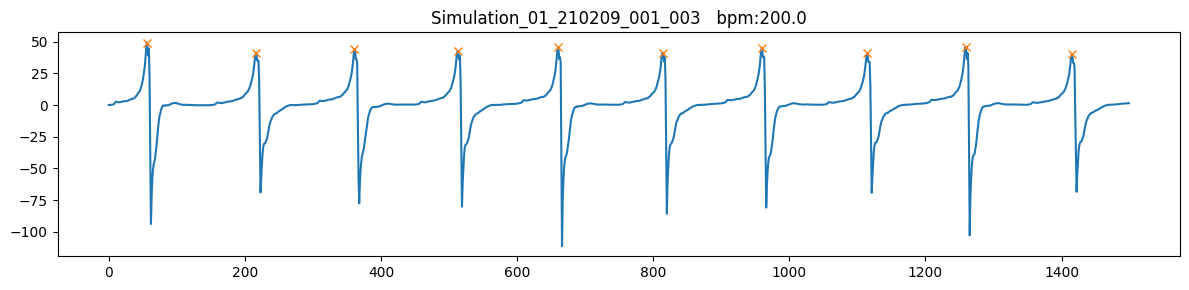

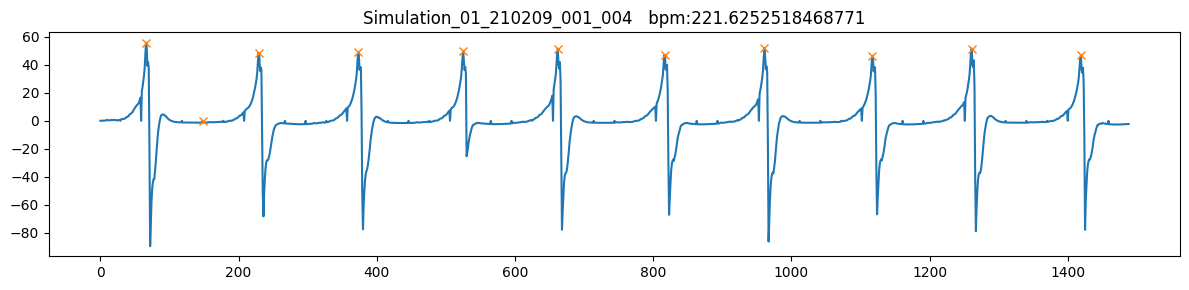

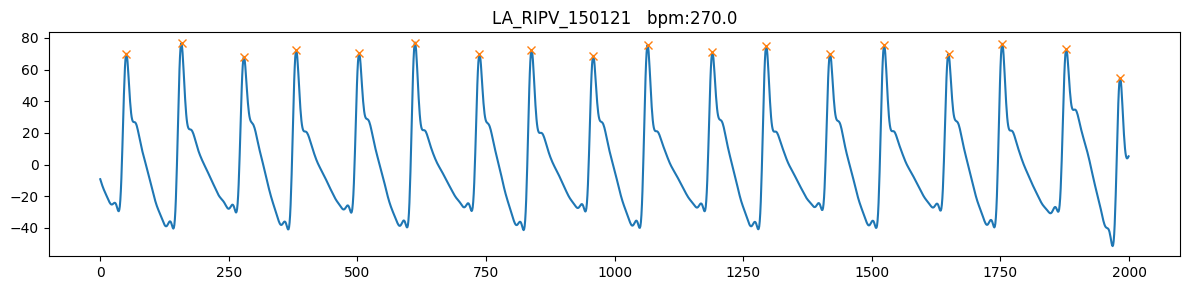

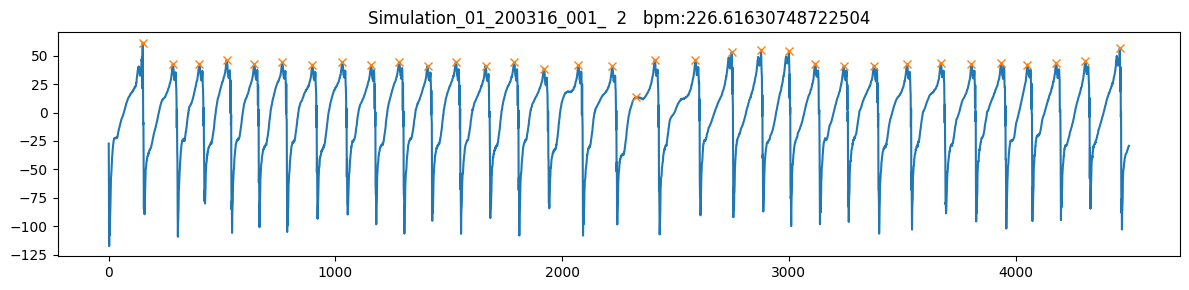

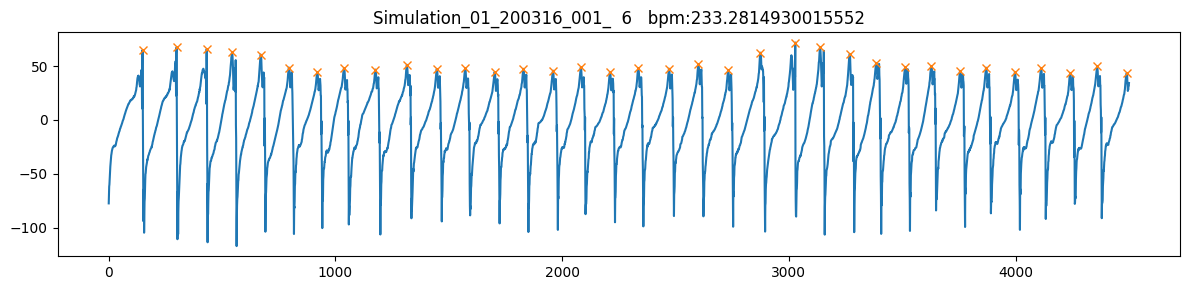

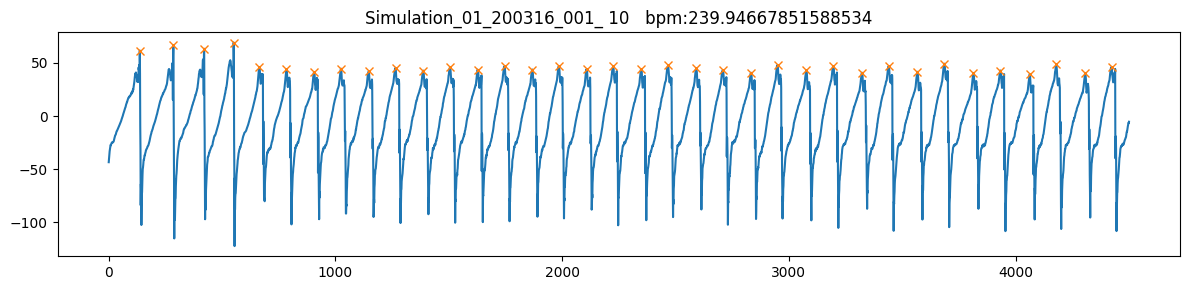

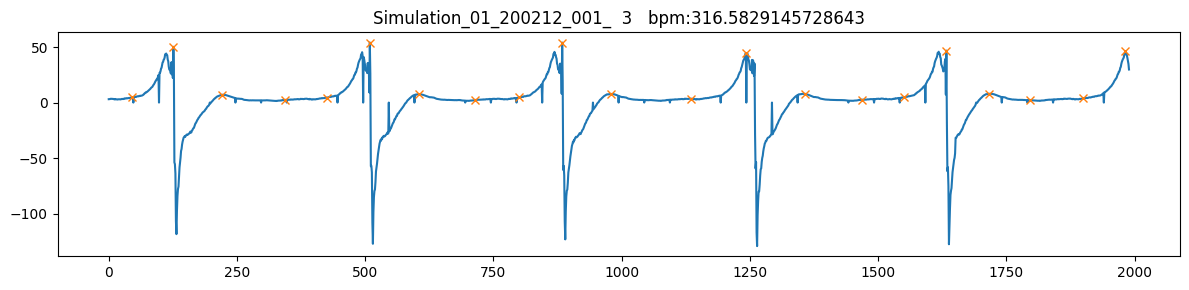

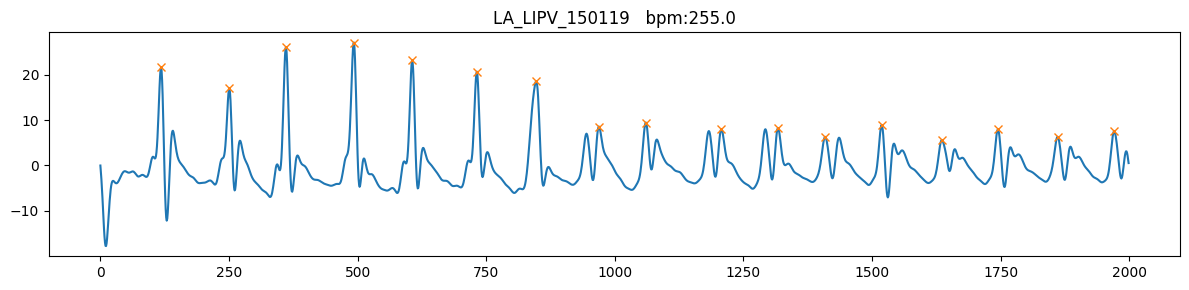

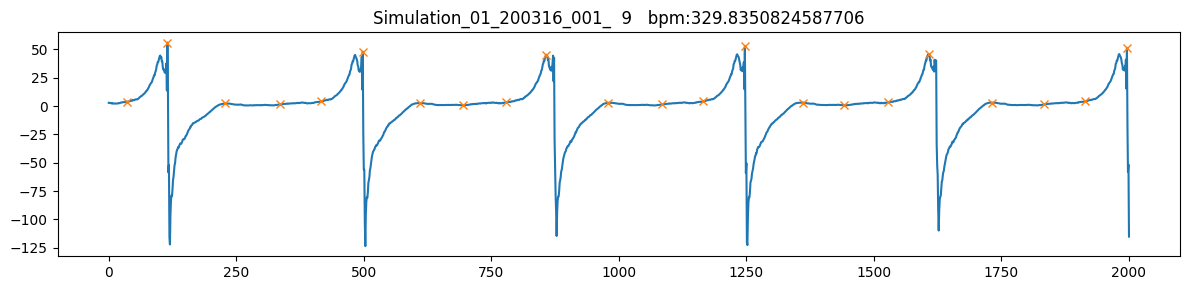

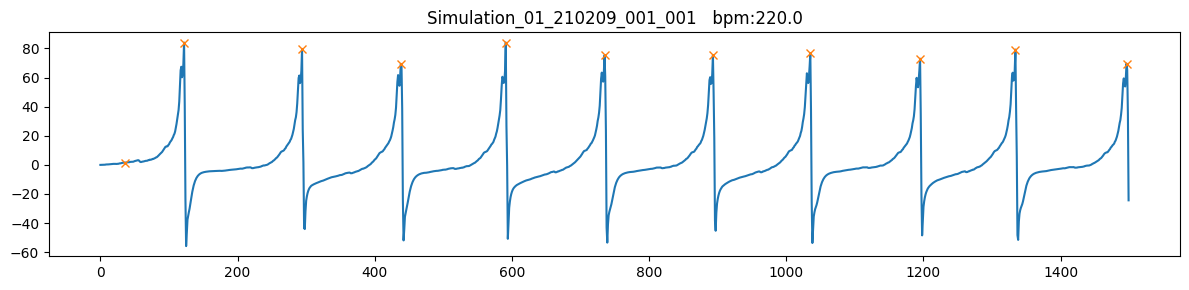

In [4]:
bpm_list=[]
for i in range(0,df.shape[0]):
   
    id_1 = df['id'][i]
    sig1 = np.array(df['AF_signal'][df['id'] == id_1])
    sig=sig1[0][0, :]
    peaks, _ = find_peaks(sig, height=0, distance=80)

    t=len(sig)/fs
    bpm=(len(peaks)*60)/t
    bpm_list.append(bpm)
    plt.figure(figsize=(12,3),tight_layout=True)
    plt.plot(sig)
    plt.plot(peaks, sig[peaks], "x")
    plt.title(id_1 + '   bpm:'+ str(bpm))
    plt.show()


  

df['bpm']=bpm_list

    


In [13]:
df.head()

id                                          AF_signal  \
14       LA_LIPV_150119  [[-0.006205437284980766, -1.4475650662061534, ...   
4        LA_LSPV_150113  [[-0.7462473339799057, -0.4222642805233415, -0...   
3        LA_LSPV_150203  [[-1.5901741637349136, -1.5606660583768013, -1...   
10  LA_LSPV_150203 copy  [[-1.5901741637349136, -1.5606660583768013, -1...   
2        LA_PLAW_140612  [[-0.8227917880841811, -0.7746437955997634, -0...   

           bpm  
14  312.124850  
4   270.000000  
3   270.000000  
10  270.000000  
2   288.115246

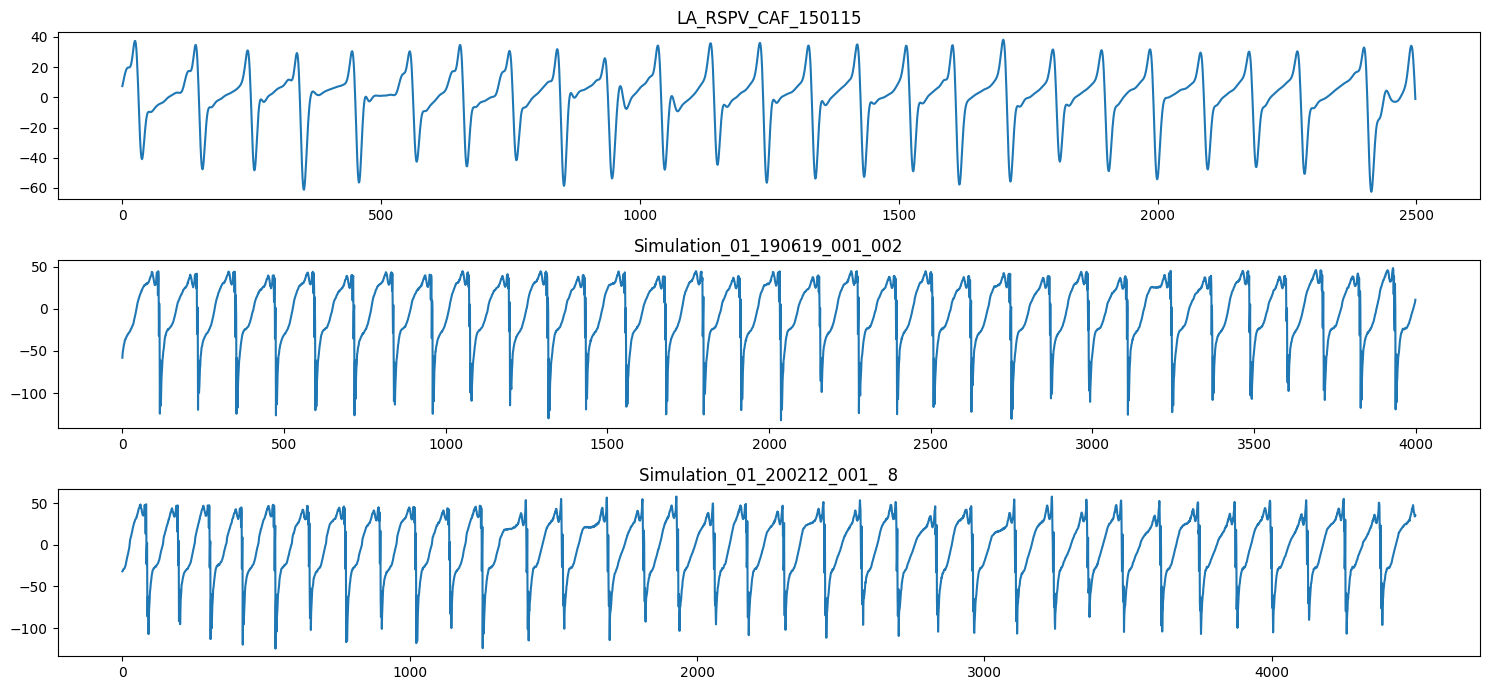

In [11]:
id_1 = 'LA_RSPV_CAF_150115'
id_2 = 'Simulation_01_190619_001_002'
id_3 = 'Simulation_01_200212_001_  8'
sig1 = np.array(df['AF_signal'][df['id'] == id_1])
sig2 = np.array(df['AF_signal'][df['id'] == id_2])
sig3 = np.array(df['AF_signal'][df['id'] == id_3])


plt.figure(figsize=(15,7),tight_layout=True)
plt.subplot(3, 1, 1)
plt.plot(sig1[0][0, :])
plt.title(id_1)
plt.subplot(3, 1, 2)
plt.plot(sig2[0][0, :])
plt.title(id_2)
plt.subplot(3, 1, 3)
plt.plot(sig3[0][0, :])
plt.title(id_3)
plt.show()